<a href="https://colab.research.google.com/github/Zver1952299/lung_cancer/blob/main/detecting_lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This project serves as an assistant for doctors and patients in determining the presence of a disease such as lung cancer.**

# We connect libraries, upload data, and perform a surface analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/survey lung cancer.csv')
df.head() # we are looking at the general view of the dataset
# 2 - YES
# 1 - NO

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.shape # it consists of 3000 rows and 16 columns

(309, 16)

In [ ]:
df['AGE'].describe().round(2) # analyzing the age of patients

,AGE
count,309.00
mean,62.67
std,8.21
min,21.00
25%,57.00
50%,62.00
75%,69.00
max,87.00


In [ ]:
df.dtypes # analyzing data types

,0
GENDER,object
AGE,int64
SMOKING,int64
YELLOW_FINGERS,int64
ANXIETY,int64
PEER_PRESSURE,int64
CHRONIC DISEASE,int64
FATIGUE,int64
ALLERGY,int64
WHEEZING,int64


# Data cleaning

In [ ]:
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
df.info() # The data does not require cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# Charts

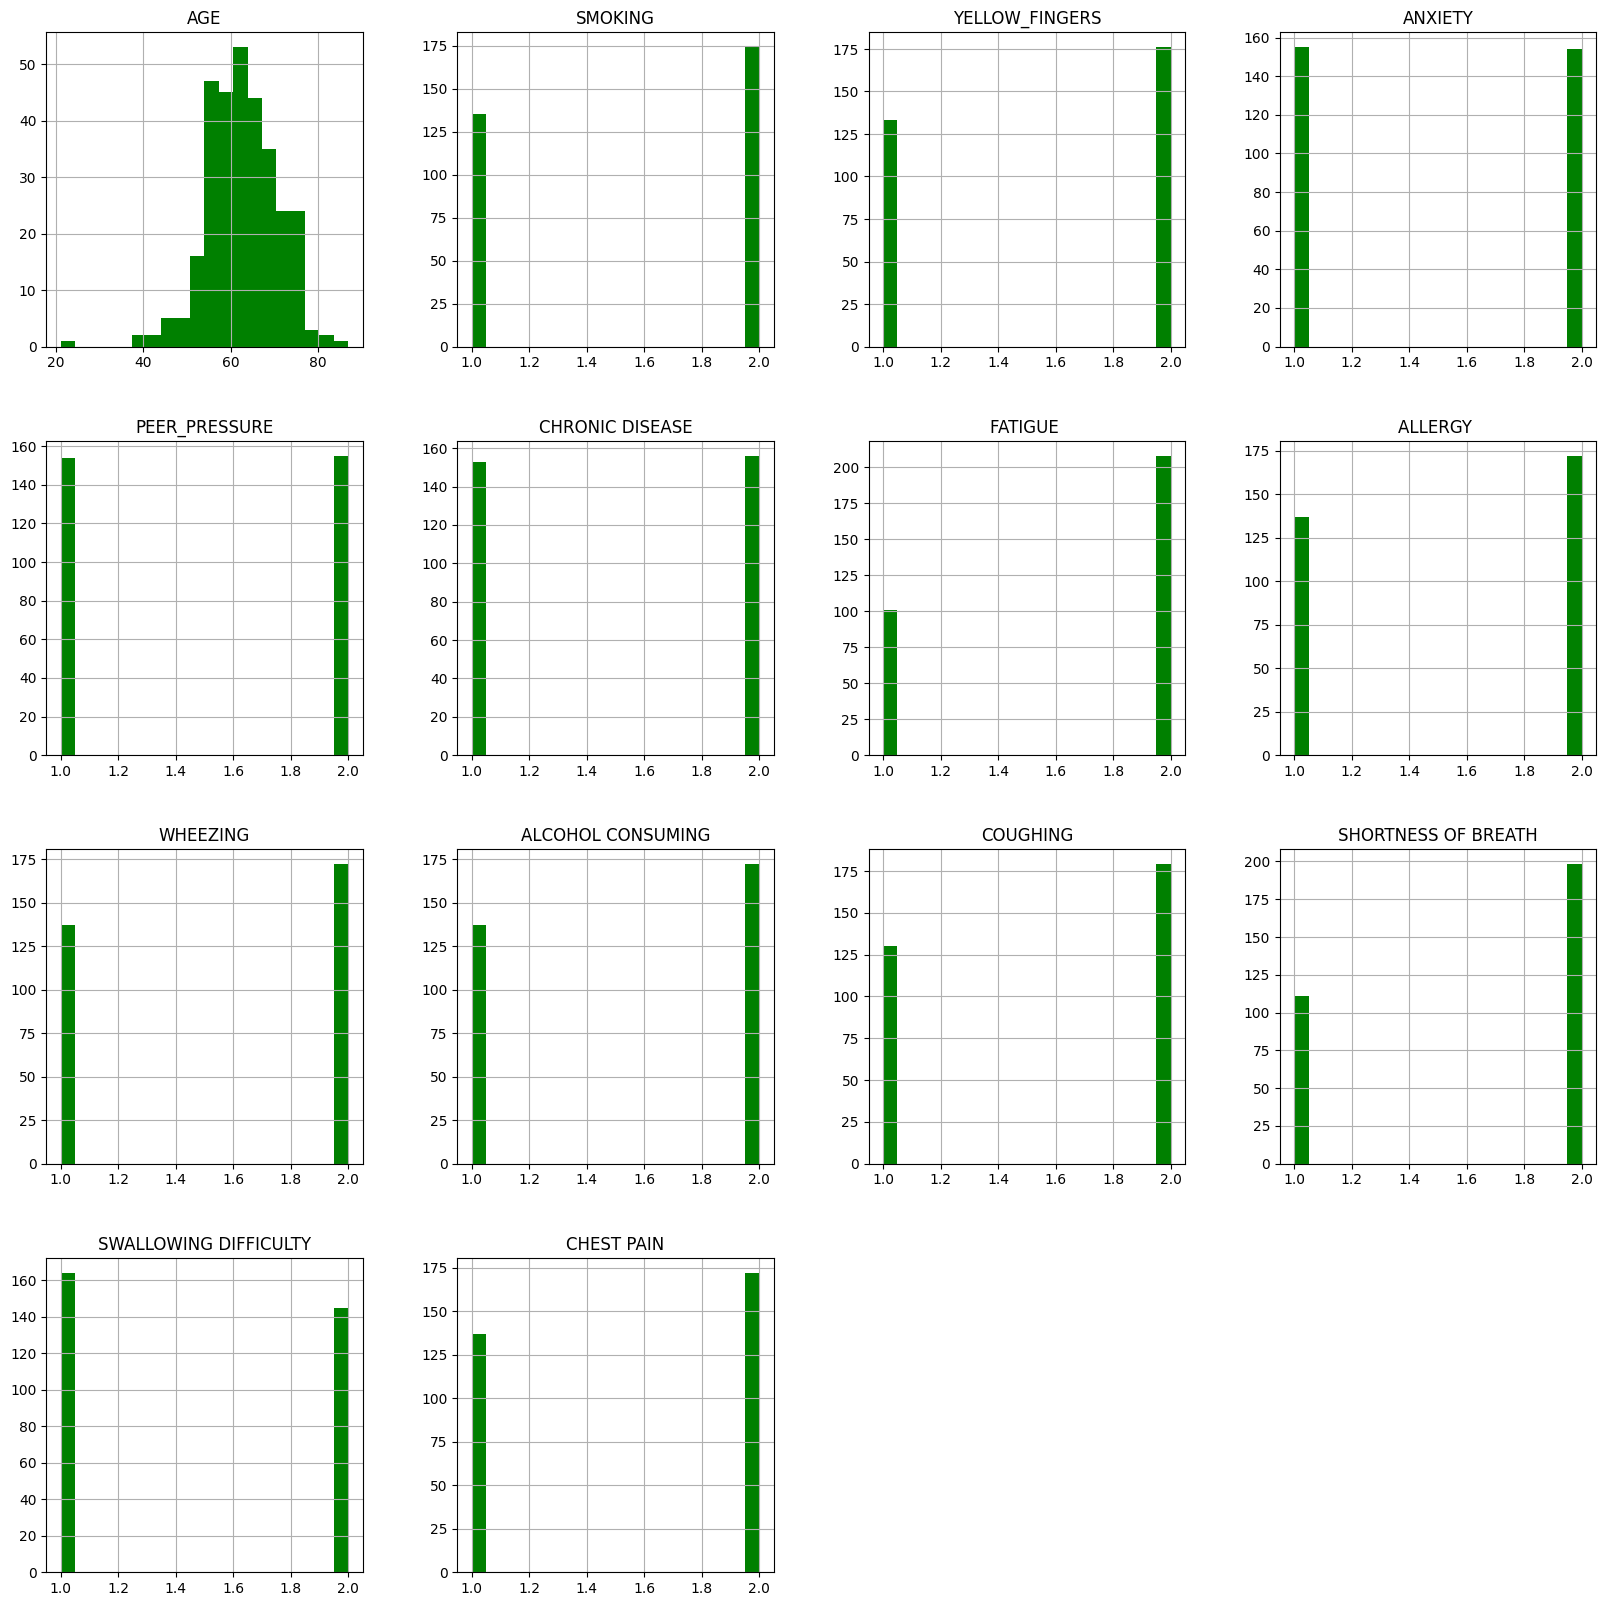

In [ ]:
df.hist(bins=20, figsize=(20, 20), color='green')
plt.show()
# We build graphs with digital values

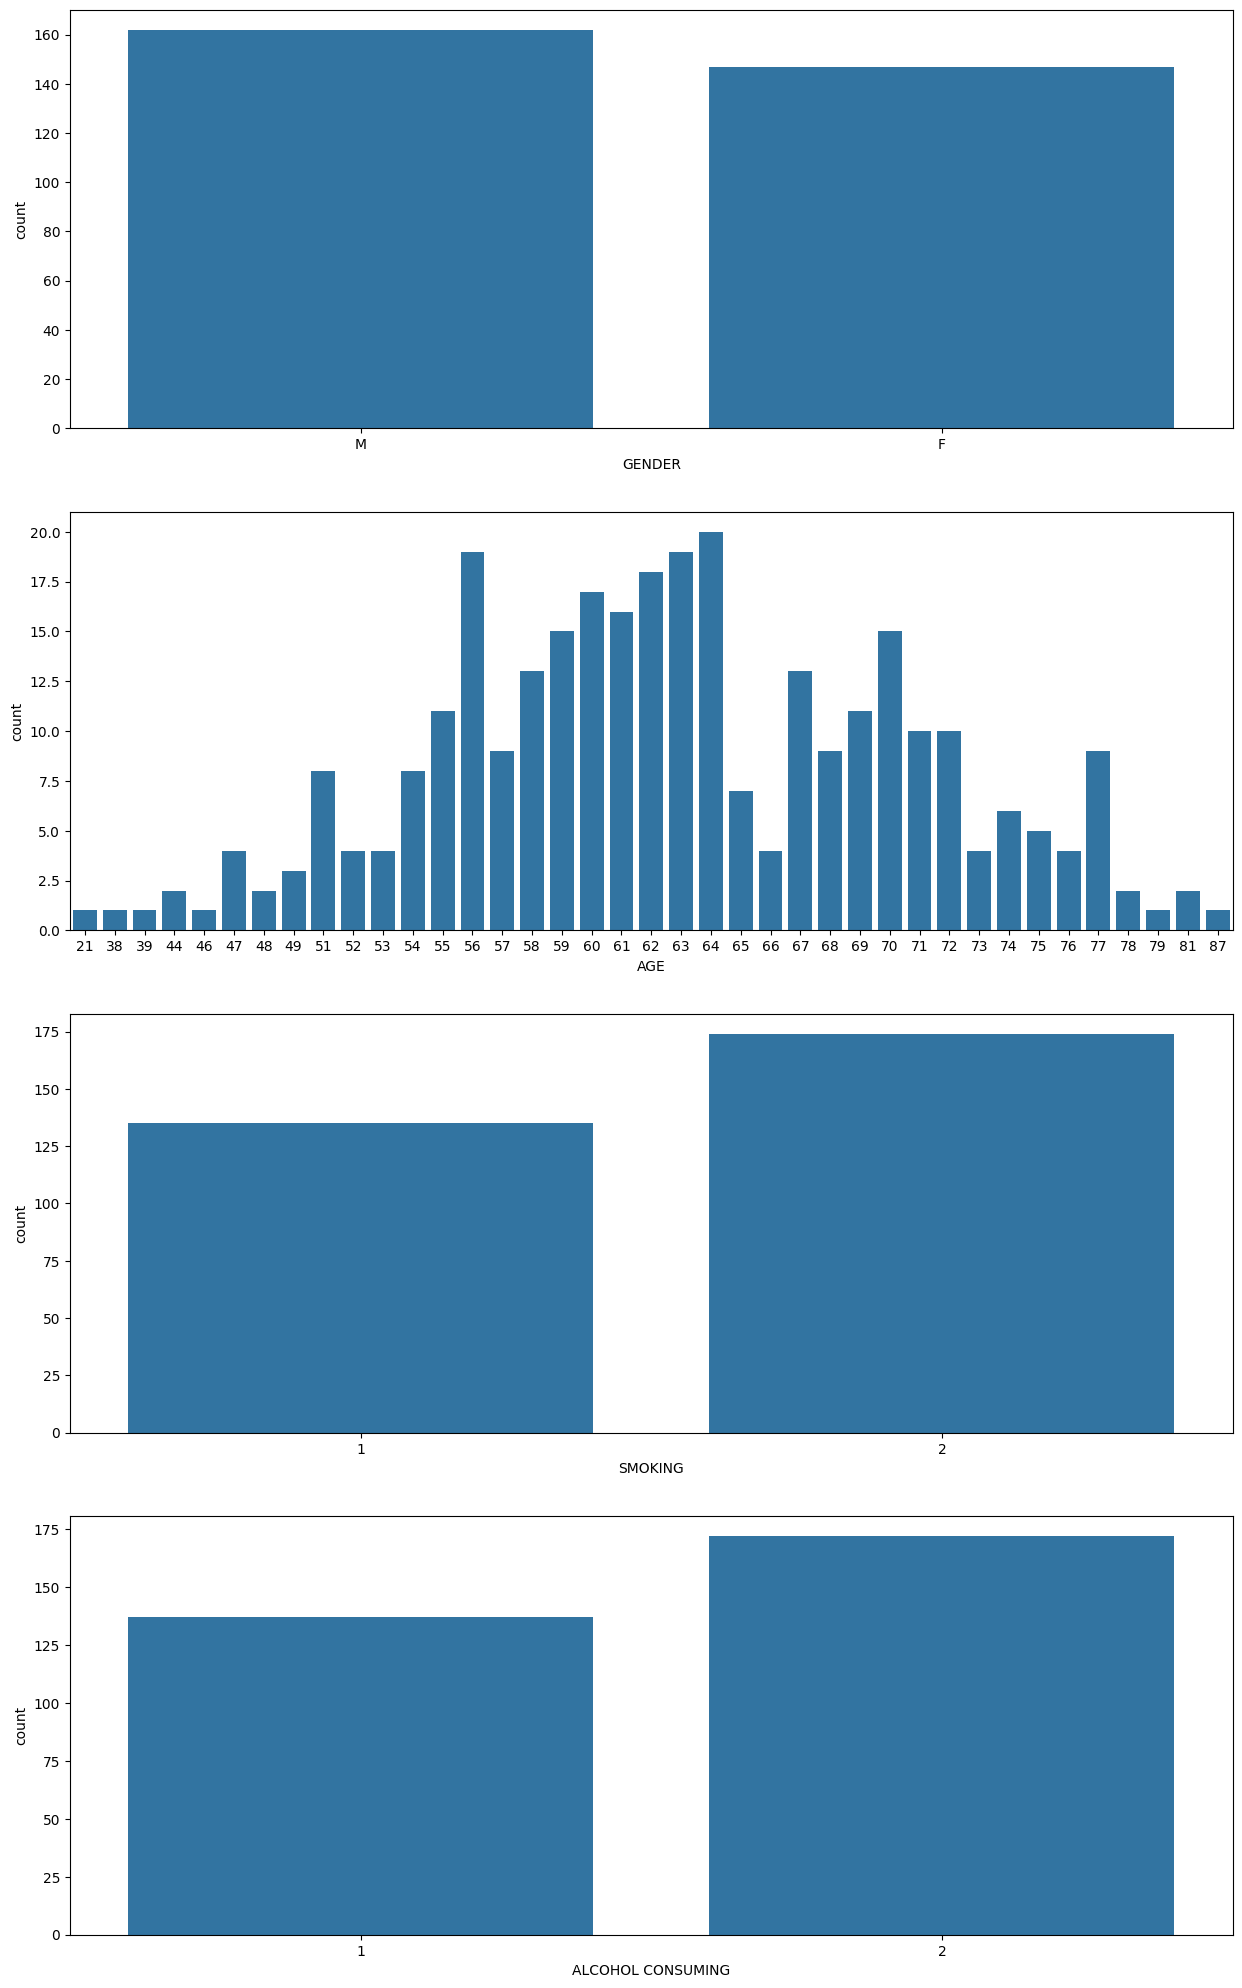

In [ ]:
cols = ['GENDER', 'AGE', 'SMOKING', 'ALCOHOL CONSUMING']
plt.figure(figsize=(15, 25))
for i, col in enumerate(cols):
    plt.subplot(4, 1, i + 1)
    sns.countplot(x=col, data=df)
plt.show()
# We analyze graphs of gender, age, smoking and alcohol consumption

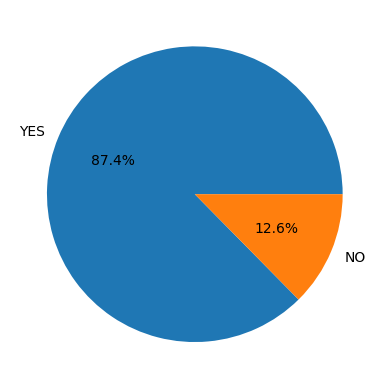

In [ ]:
plt.pie(df['LUNG_CANCER'].value_counts(), labels=['YES', 'NO'], autopct='%1.1f%%')
plt.show()
# Analyzing the schedule of the presence of lung cancer

# Column data encoding

In [ ]:
df.select_dtypes(include='object').columns
# two columns have a string data type

Index(['GENDER', 'LUNG_CANCER'], dtype='object')

In [ ]:
df['GENDER'].unique()
# GENDER has two unique meanings

array(['M', 'F'], dtype=object)

In [ ]:
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])
df.head()
# encoding the gender column
# he data should consist of numbers

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
df.info()
# We observe that the data for training the model consists of numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

# Additional charts

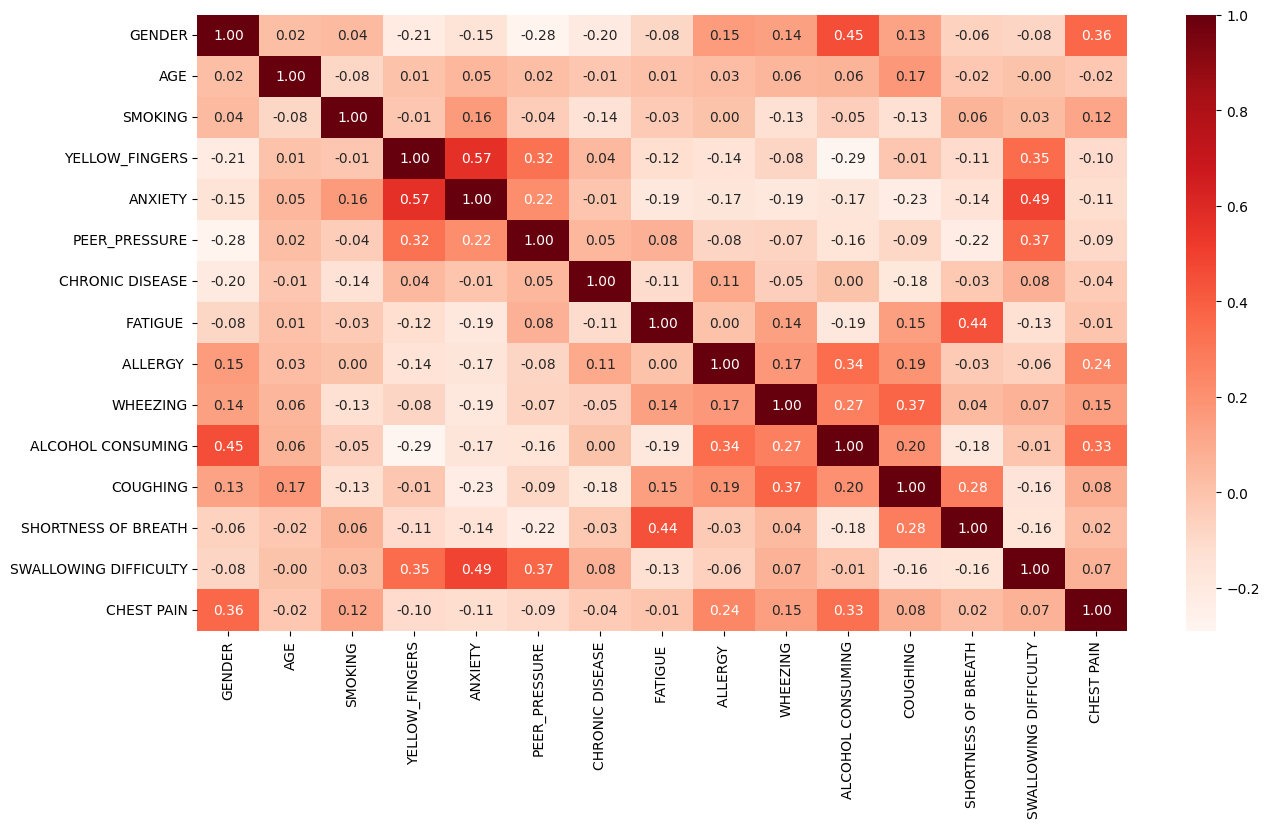

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.drop(columns='LUNG_CANCER').corr(), annot=True, fmt='.2f', cmap='Reds')
plt.show()
# Let's examine the correlation graph

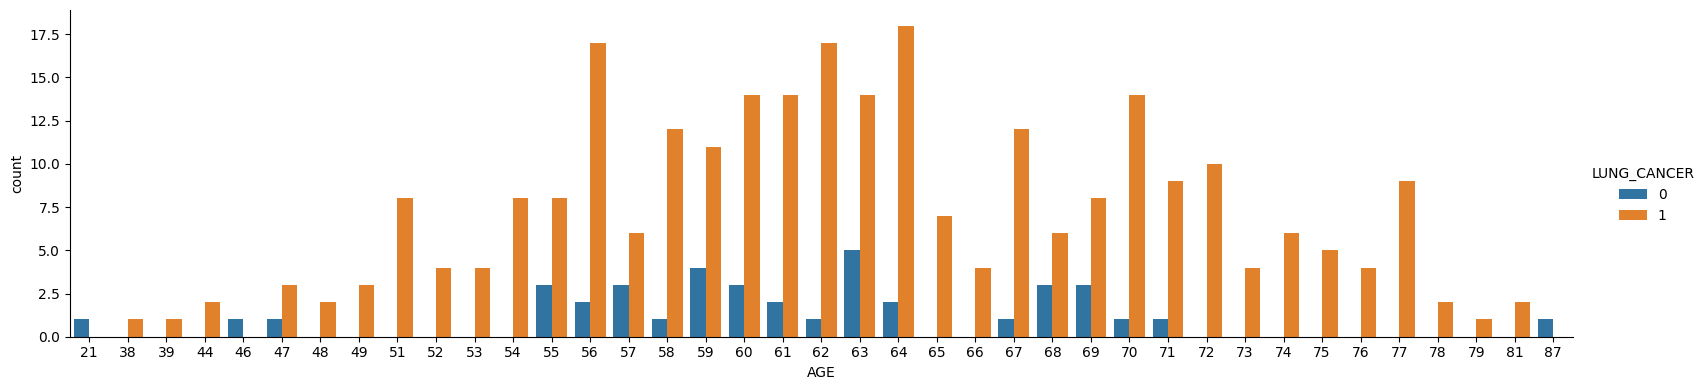

In [ ]:
sns.catplot(data=df, x='AGE', height=4, aspect=4, kind='count', hue='LUNG_CANCER')
plt.show()
# A graph of a person's age and the presence of the disease

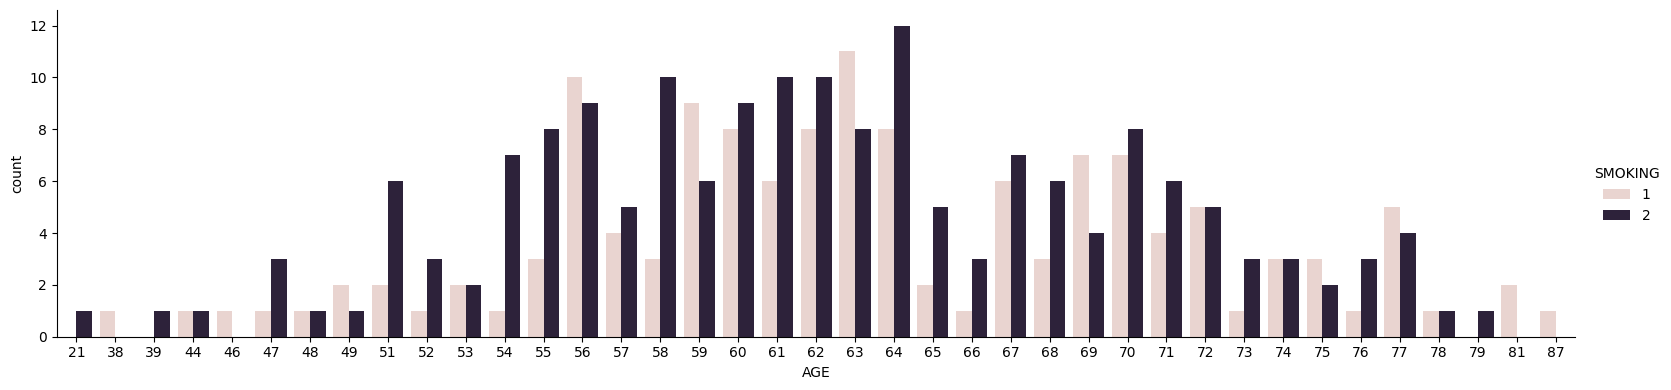

In [ ]:
sns.catplot(data=df, x='AGE', height=4, aspect=4, kind='count', hue='SMOKING')
plt.show()
# A graph of a person's age and smoking

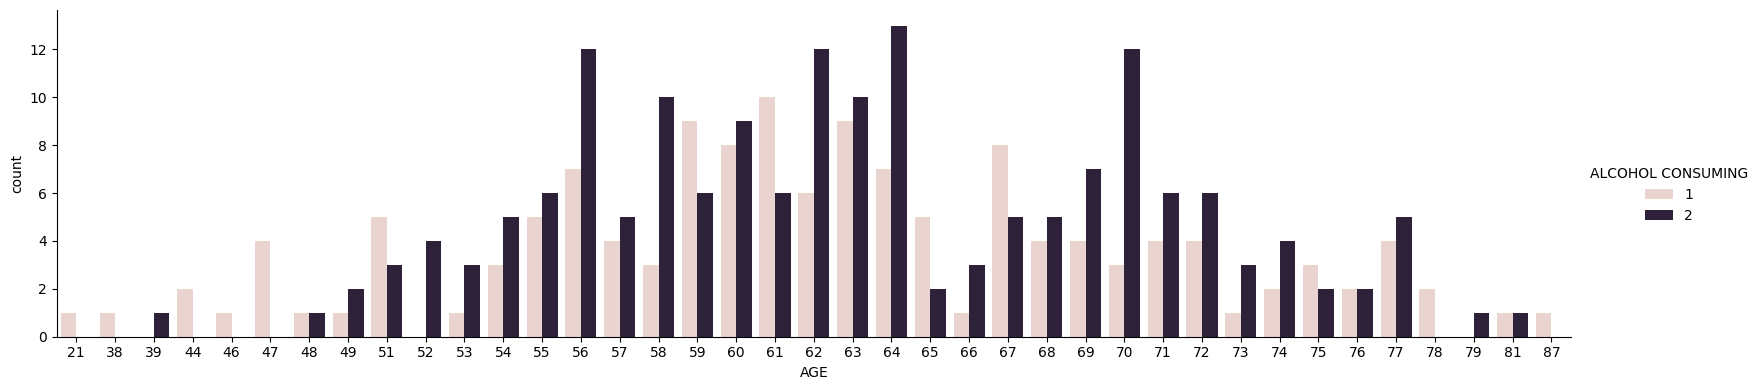

In [ ]:
sns.catplot(data=df, x='AGE', height=4, aspect=4, kind='count', hue='ALCOHOL CONSUMING')
plt.show()
# A graph of a person's age and alcohol consumption

# Filtering data

In [ ]:
len(df[df['AGE'] <= 55])
# The number of patients under 55 years of age

50

In [ ]:
len(df[df['AGE'] > 55])
# Number of patients after 55 years of age

259

# Models

In [ ]:
X = df.drop(columns='LUNG_CANCER')
y = df['LUNG_CANCER']
# We divide the data into target and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)
# next, we divide it into training and test data

## DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)

model_score = accuracy_score(y_test, pred)
model_score

0.9354838709677419

## XGBClassifier

In [ ]:
model = XGBClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)

model_score = accuracy_score(y_test, pred)
model_score

0.9516129032258065

## LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

pred = model.predict(X_test)

model_score = accuracy_score(y_test, pred)
model_score

0.967741935483871

## KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)

model_score = accuracy_score(y_test, pred)
model_score

0.9516129032258065

## RandomForestClassifier

In [ ]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

pred = model.predict(X_test)

model_score = accuracy_score(y_test, pred)
model_score

0.9838709677419355

## We ran the data through different algorithms. RandomForestClassifier showed the best result.

# Now you can enter the data of a new patient to determine the presence of the disease

In [ ]:
test_input = {
    'GENDER': [1],
    'AGE': [30],
    'SMOKING': [2],
    'YELLOW_FINGERS': [1],
    'ANXIETY': [2],
    'PEER_PRESSURE': [1],
    'CHRONIC DISEASE': [1],
    'FATIGUE ': [2],
    'ALLERGY ': [2],
    'WHEEZING': [1],
    'ALCOHOL CONSUMING': [1],
    'COUGHING': [1],
    'SHORTNESS OF BREATH': [2],
    'SWALLOWING DIFFICULTY': [1],
    'CHEST PAIN': [1]
}

test_df = pd.DataFrame(test_input)

model.predict(test_df)
# 0 - No
# 1 - Yes

array([0])